# Customer Segmentation Analysis With Python 

#### Importing libraries

In [1]:
import pandas as pd

#### Importing Data

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [43]:
df.tail()

,Annual Income (k$),Spending Score (1-100),cluster_number
195,120,79,3
196,126,28,2
197,126,74,3
198,137,18,2
199,137,83,3


#### shape 

In [4]:
df.shape

(200, 5)

Dataset has 200 observations and 5 Features

#### Info about Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Numerical Features

In [6]:
numerical_Fetures = df.select_dtypes(exclude = 'O')
numerical_Fetures.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

#### Categorical Features

In [7]:
categorical_cols = df.select_dtypes(include = 'O')
categorical_cols.columns

Index(['Gender'], dtype='object')

#### Checking null values in dataset

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.isnull().sum().sum()

0

Theire is no null values in dataset

#### Checking duplicated records

In [10]:
df.duplicated().sum()

0

No duplicate records found

#### Summary of Dataset

In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Dropping unwanted column

In [12]:
df.drop(['CustomerID'], axis = 1, inplace = True)

In [13]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

### Exploratory Data Analysis

### Univariate Analysis

##### Gender

In [14]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\bhush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

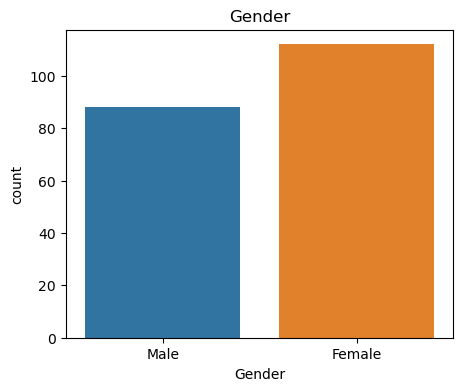

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(df['Gender'])
plt.title('Gender')
plt.show()

Females are more than males 

male = 88

Female = 112

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##### Age

In [17]:
df.Age.value_counts().head()

32    11
35     9
19     8
31     8
30     7
Name: Age, dtype: int64

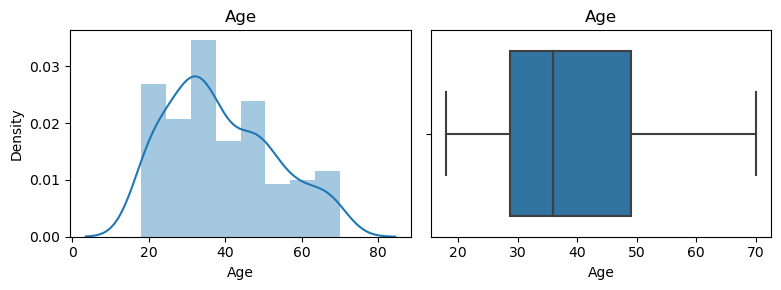

In [18]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.title('Age')

plt.subplot(1,2,2)
sns.boxplot(df['Age'])
plt.title('Age')
plt.tight_layout()
plt.show()



The distribution of Age variable is right skewed

In [19]:
print('min age in the dataset :',df['Age'].min())
print('max age in the dataset :',df['Age'].max())

min age in the dataset : 18
max age in the dataset : 70


##### Annual Income (k$)

In [20]:
df['Annual Income (k$)'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

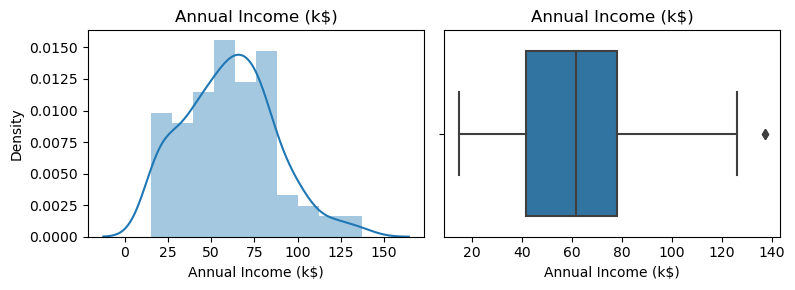

In [21]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.distplot(df['Annual Income (k$)'])
plt.title('Annual Income (k$)')

plt.subplot(1,2,2)
sns.boxplot(df['Annual Income (k$)'])
plt.title('Annual Income (k$)')
plt.tight_layout()
plt.show()

##### Spending Score (1-100)

In [22]:
df['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64

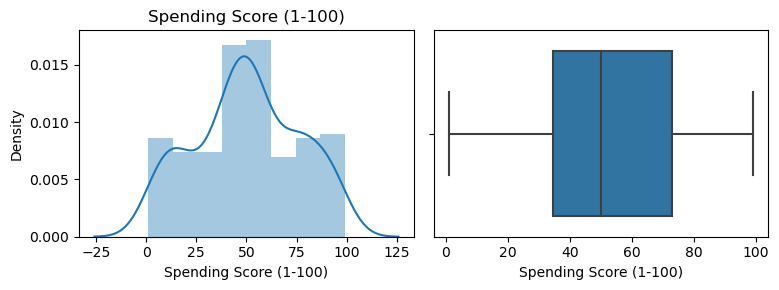

In [23]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.distplot(df['Spending Score (1-100)'])
plt.title('Spending Score (1-100)')

plt.subplot(1,2,2)
sns.boxplot(df['Spending Score (1-100)'])
plt.tight_layout()
plt.show()

## Bivariate Analysis

##### Gender vs spending Score

<Figure size 2000x1800 with 0 Axes>

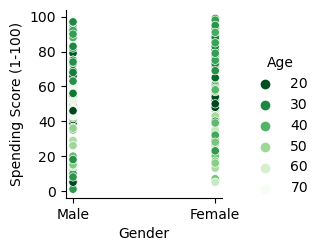

In [24]:
plt.figure(figsize=(20,18))
sns.pairplot(df,x_vars=['Gender'],y_vars=['Spending Score (1-100)'],kind='scatter',hue='Age',palette='Greens_r')

##### Age vs Annual Income

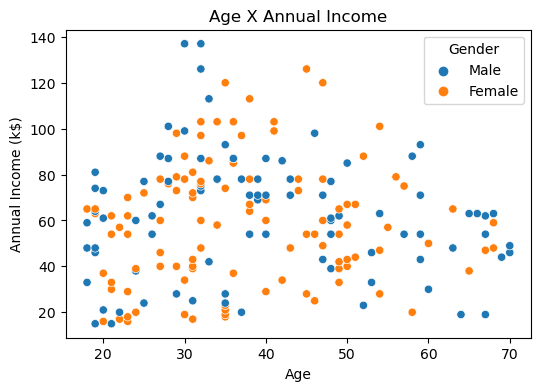

In [25]:
plt.figure(figsize=(6,4))
sns.scatterplot(data = df, x = 'Age', y = 'Annual Income (k$)', hue = 'Gender')
plt.title('Age X Annual Income')
plt.show()

##### Age vs spending Score

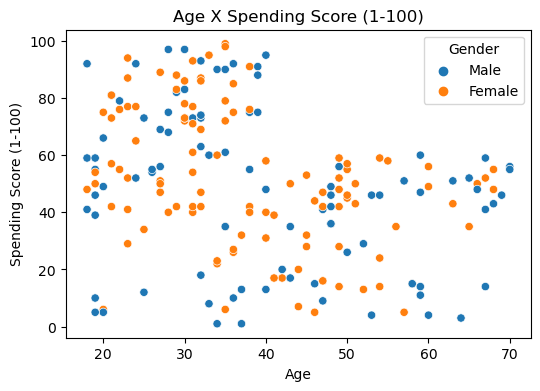

In [26]:
plt.figure(figsize=(6,4))
sns.scatterplot(data = df, x = 'Age', y = 'Spending Score (1-100)', hue = 'Gender')
plt.title('Age X Spending Score (1-100)')
plt.show()

##### Annual Income (k$) vs Spending Score (1-100)

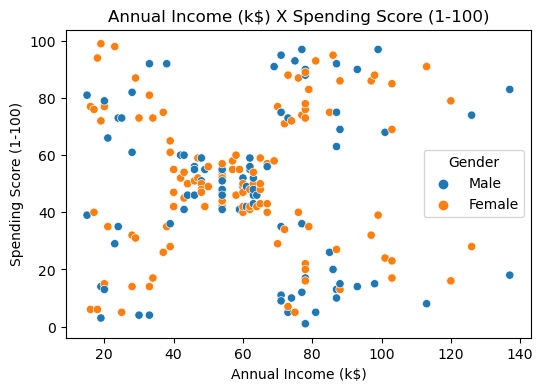

In [27]:
plt.figure(figsize=(6,4))
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Gender')
plt.title('Annual Income (k$) X Spending Score (1-100)')
plt.show()

### Multivariate analysis

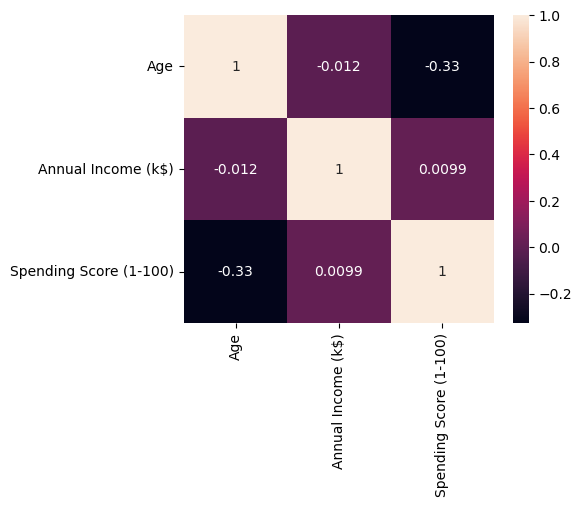

In [28]:
plt.figure(figsize = (5,4))
sns.heatmap(df.corr(), annot=True)
plt.show()

variables itself correlated very well.

Spending Score (1-100) is weakly positivley correlated with Annual Income (k$).

age is negativkey correlated with Spending Score (1-100) and Annual Income (k$)

#### Correlation

In [29]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Figure size 500x400 with 0 Axes>

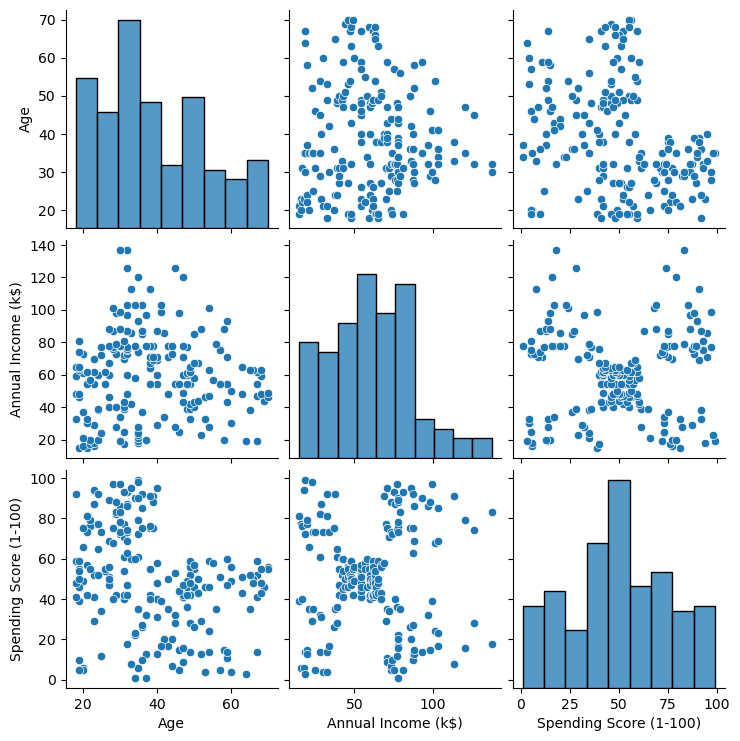

In [30]:
plt.figure(figsize=(5,4))
sns.pairplot(df)
plt.show()

## Clustering

In [31]:
from sklearn.cluster import KMeans

In [32]:
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [33]:
kmeans = KMeans(n_clusters= 5, init ='k-means++', random_state = 30)

In [35]:
kmeans.fit_predict(df)

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [36]:
df['cluster_number']= kmeans.fit_predict(df)

C:\Users\bhush\AppData\Local\Temp\ipykernel_20276\268809452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_number']= kmeans.fit_predict(df)


In [37]:
df

,Annual Income (k$),Spending Score (1-100),cluster_number
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,2
197,126,74,3
198,137,18,2


In [38]:
df.cluster_number.value_counts()

1    81
3    39
2    35
4    23
0    22
Name: cluster_number, dtype: int64

In [39]:
df[df['cluster_number'] == 1]

,Annual Income (k$),Spending Score (1-100),cluster_number
43,39,61,1
46,40,55,1
47,40,47,1
48,40,42,1
49,40,42,1
...,...,...,...
121,67,40,1
122,69,58,1
126,71,35,1
132,72,34,1


<AxesSubplot:xlabel='cluster_number', ylabel='Spending Score (1-100)'>

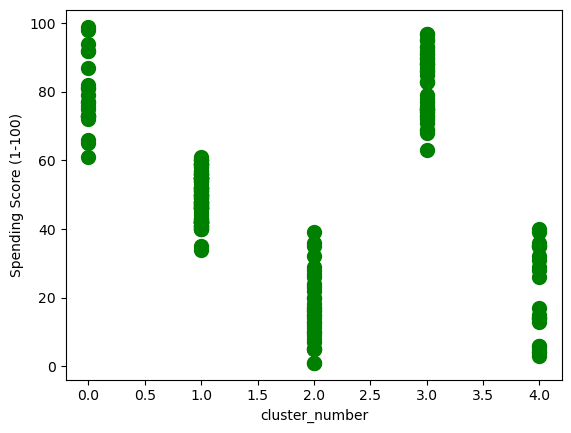

In [40]:
df.plot.scatter(x = 'cluster_number',y='Spending Score (1-100)', s = 100,c='g')

<AxesSubplot:xlabel='cluster_number', ylabel='Annual Income (k$)'>

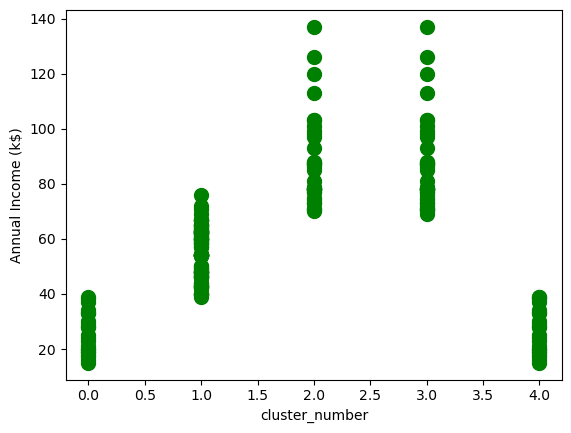

In [41]:
df.plot.scatter(y = 'Annual Income (k$)',x='cluster_number', s = 100,c='g')

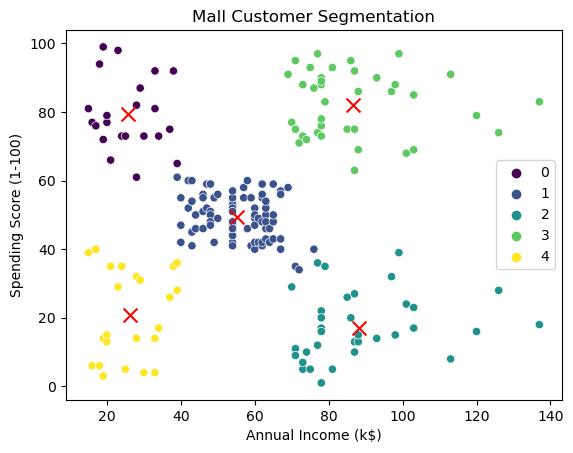

In [42]:
labels=kmeans.labels_

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall Customer Segmentation')

sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=labels, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', s=100)